In [ ]:
pip install -r requirements.txt

   ---------------------------------------- 0.0/11.2 MB ? eta -:--:--
   ------------- -------------------------- 3.7/11.2 MB 18.2 MB/s eta 0:00:01
   ---------------------- ----------------- 6.3/11.2 MB 14.9 MB/s eta 0:00:01
   ------------------------------- -------- 8.9/11.2 MB 14.2 MB/s eta 0:00:01
   ---------------------------------------- 11.2/11.2 MB 13.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   -- ------------------------------------- 3.1/46.2 MB 15.4 MB/s eta 0:00:03
   ---- ----------------------------------- 5.8/46.2 MB 13.6 MB/s eta 0:00:03
   ------- -------------------------------- 8.4/46.2 MB 13.0 MB/s eta 0:00:03
   --------- ------------------------------ 10.7/46.2 MB 12.7 MB/s eta 0:00:03
   ----------- ---------------------------- 13.4/46.2 MB 12.5 MB/s eta 0:00:03
   ------------- -------------------------- 16.0/46.2 MB 12.6 MB/s eta 0:00:03
   ---------------- ----------------------- 18.6/46.2 MB 12.5 MB/s eta 0:00:

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import tensorflow as tf
from keras.preprocessing import image
from tensorflow. keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dropout, Dense
from sklearn. model_selection import train_test_split
from keras.models import model_from_json
from keras.utils import to_categorical

In [ ]:
print(tf. __version__)

2.19.0


## **Dataset Culling For a Balanced Dataset**

In [5]:
import os
import random
import shutil

# Define your copied folders in Colab instance
folders = {
    'Corn_(maize)___Common_rust_': r'C:\Users\lalit\Downloads\Mini-Project\dataset\Corn_(maize)___Common_rust_',
    'Potato___Early_blight': r'C:\Users\lalit\Downloads\Mini-Project\dataset\Potato___Early_blight',
    'Tomato___Bacterial_spot': r'C:\Users\lalit\Downloads\Mini-Project\dataset\Tomato___Bacterial_spot'
}

# Define the number of images to sample from each folder
num_samples_per_folder = {
    'Corn_(maize)___Common_rust_': 1700,
    'Potato___Early_blight': 1700,
    'Tomato___Bacterial_spot': 1700
}

# Destination root for sampled data
sampled_root = r'C:\Users\lalit\Downloads\Mini-Project\sampled_dataset'
os.makedirs(sampled_root, exist_ok=True)

# Cull each folder
for folder_name, folder_path in folders.items():
    # Output folder for sampled images
    output_path = os.path.join(sampled_root, folder_name)
    os.makedirs(output_path, exist_ok=True)

    # Get list of all image files in the directory
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    total_images = len(image_files)

    # Number of images to sample from this folder
    num_samples = num_samples_per_folder[folder_name]

    # Adjust sampling size if not enough images are available
    if num_samples > total_images:
        print(f"⚠️ Not enough images in {folder_name}. Sampling all {total_images} images instead.")
        sampled_images = image_files  # Take all available images
    else:
        # Randomly sample images
        sampled_images = random.sample(image_files, num_samples)

    # Move or copy the sampled images to the new directory
    for image_file in sampled_images:
        source = os.path.join(folder_path, image_file)
        destination = os.path.join(output_path, image_file)
        shutil.copy(source, destination)  # Copy instead of move

    print(f'✅ Successfully culled {len(sampled_images)} images from {folder_name} to {output_path}.')


✅ Successfully culled 1700 images from Corn_(maize)___Common_rust_ to C:\Users\lalit\Downloads\Mini-Project\sampled_dataset\Corn_(maize)___Common_rust_.
✅ Successfully culled 1700 images from Potato___Early_blight to C:\Users\lalit\Downloads\Mini-Project\sampled_dataset\Potato___Early_blight.
✅ Successfully culled 1700 images from Tomato___Bacterial_spot to C:\Users\lalit\Downloads\Mini-Project\sampled_dataset\Tomato___Bacterial_spot.


In [6]:
# Define your sampled folders in your local machine
sampled_folders = {
    'Corn_(maize)___Common_rust_': r'C:\Users\lalit\Downloads\Mini-Project\sampled_dataset\Corn_(maize)___Common_rust_',
    'Potato___Early_blight': r'C:\Users\lalit\Downloads\Mini-Project\sampled_dataset\Potato___Early_blight',
    'Tomato___Bacterial_spot': r'C:\Users\lalit\Downloads\Mini-Project\sampled_dataset\Tomato___Bacterial_spot'
}

# Function to count images in a folder

def count_images(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    return len(image_files)

# Check each folder
for folder_name, folder_path in sampled_folders.items():
    num_images = count_images(folder_path)
    print(f'{folder_name}: {num_images} images found.')


Corn_(maize)___Common_rust_: 1700 images found.
Potato___Early_blight: 1700 images found.
Tomato___Bacterial_spot: 1700 images found.


## **Model Training**

In [8]:
dataset_path = r'C:\Users\lalit\Downloads\Mini-Project\sampled_dataset'

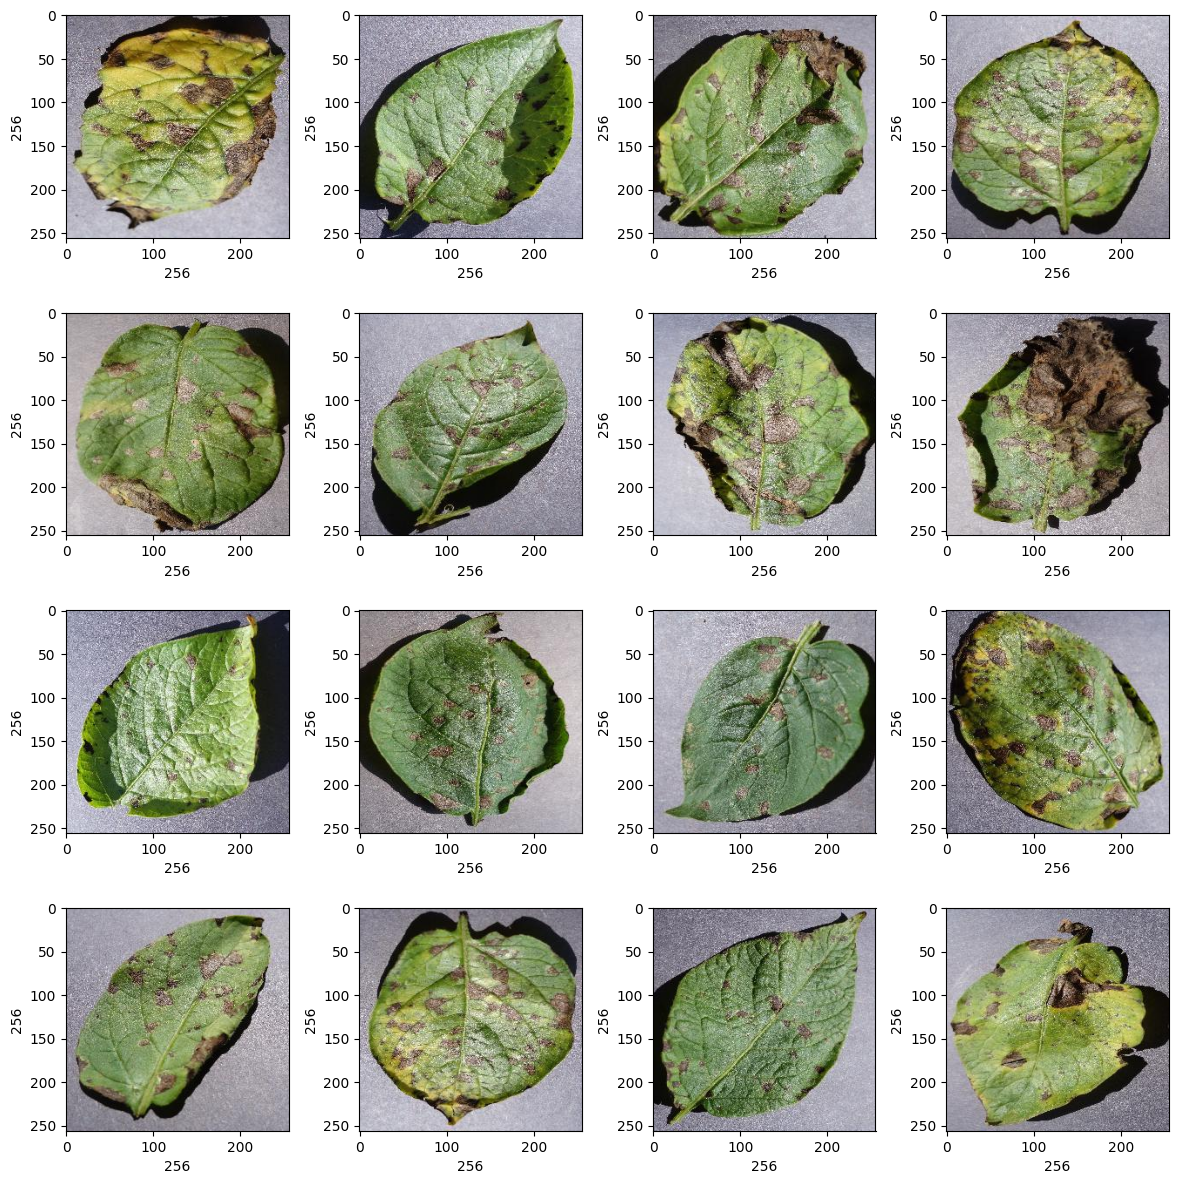

In [9]:
# Plotting 12 images to check dataset

plt.figure(figsize = (12, 12))
dataset_path =  r"C:\Users\lalit\Downloads\Mini-Project\sampled_dataset\Potato___Early_blight"

for i in range(1, 17):
    plt.subplot(4, 4, i)
    plt.tight_layout()
    rand_img = imread(dataset_path +'/'+ random.choice(sorted(os.listdir(dataset_path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10) # width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10) # height of image

In [10]:
# Converting Images to array

def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, (256, 256))
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [11]:
dataset_path = r"C:\Users\lalit\Downloads\Mini-Project\sampled_dataset"
labels = os.listdir(dataset_path)

print(labels)

['Corn_(maize)___Common_rust_', 'Potato___Early_blight', 'Tomato___Bacterial_spot']


In [13]:
dataset_path = r"C:\Users\lalit\Downloads\Mini-Project\sampled_dataset"
root_dir = listdir(dataset_path)
image_list, label_list = [], []
all_labels = ['Corn-Common_rust', 'Potato-Early_blight', 'Tomato-Bacterial_spot']
binary_labels = [0, 1, 2]
temp = -1

# Reading and converting image to numpy array

for directory in root_dir:
  plant_image_list = listdir(f"{dataset_path}/{directory}")
  temp += 1
  for files in plant_image_list:
    image_path = f"{dataset_path}/{directory}/{files}"
    image_list.append(convert_image_to_array(image_path))
    label_list.append(binary_labels[temp])

In [14]:
# Visualize the number of classes count

label_counts = pd.DataFrame(label_list).value_counts()
label_counts.head()

0
0    1700
1    1700
2    1700
Name: count, dtype: int64

In [15]:
# Next we will observe the shape of the image.

image_list[0].shape

(256, 256, 3)

In [16]:
# Checking the total number of the images which is the length of the labels list.

label_list = np.array(label_list)
label_list.shape

(5100,)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10)

In [18]:
# Now we will normalize the dataset of our images. As pixel values ranges from 0 to 255 so we will divide each image pixel with 255 to normalize the dataset.

x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape(-1, 256, 256, 3)
x_test = x_test.reshape(-1, 256, 256, 3)

In [19]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = "same",input_shape = (256, 256, 3), activation = "relu"))
model.add(MaxPooling2D(pool_size = (3, 3)))
model.add(Conv2D(16, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(8, activation = "relu"))
model.add(Dense(3, activation = "softmax"))
model.summary()

c:\Users\lalit\.conda\envs\mini-project\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 85, 85, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 85, 85, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 42, 42, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │       225,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 231,347 (903.70 KB)

 Trainable params: 231,347 (903.70 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0001), metrics = ['accuracy'])

In [22]:
# Splitting the training data set into training and validation data sets

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 10)

In [23]:
# Training the model

epochs = 50
batch_size = 64
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.4772 - loss: 0.8528 - val_accuracy: 0.8260 - val_loss: 0.4322
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8800 - loss: 0.3775 - val_accuracy: 0.9706 - val_loss: 0.2727
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.9622 - loss: 0.2522 - val_accuracy: 0.9877 - val_loss: 0.2079
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 47s 899ms/step - accuracy: 0.9783 - loss: 0.2097 - val_accuracy: 0.9877 - val_loss: 0.1519
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 49s 949ms/step - accuracy: 0.9839 - loss: 0.1556 - val_accuracy: 0.9865 - val_loss: 0.1193
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 51s 977ms/step - accuracy: 0.9856 - loss: 0.1118 - val_accuracy: 0.9890 - val_loss: 0.0721
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 49s 947ms/step - accuracy: 0.9862 - loss: 0.0760 - val_accuracy: 0.9890 - val_loss: 0.0541
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 46s 894ms/step - accuracy: 0.9936 - loss: 0.0523 - val_accuracy: 0.9

In [25]:
model.save(r"C:\Users\lalit\Downloads\Mini-Project\plant_disease_model.h5")


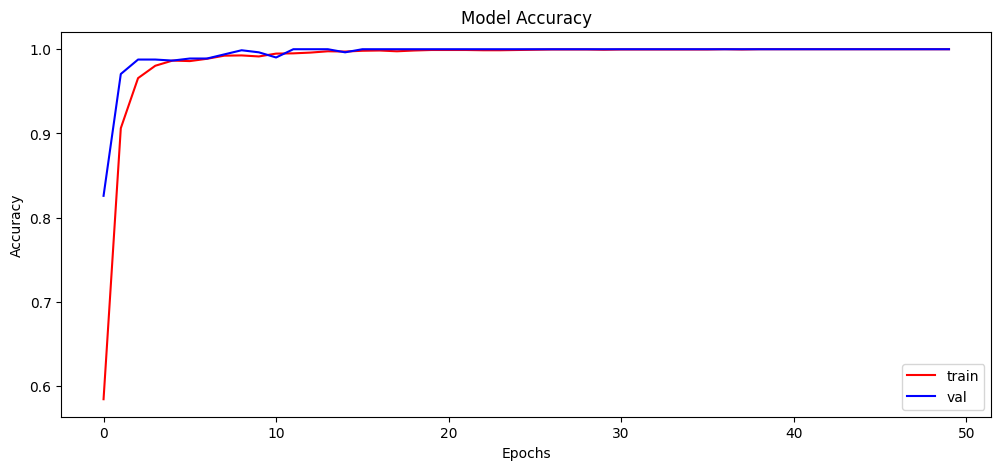

In [26]:
# Plot the training history

plt.figure(figsize = (12, 5))
plt.plot(history.history['accuracy'], color = 'r')
plt.plot(history.history['val_accuracy'], color = 'b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])

plt.show()


In [27]:
print("Calculating model accuracy")

scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1] * 100}")

Calculating model accuracy
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.9976 - loss: 0.0074
Test Accuracy: 99.8039186000824


In [28]:
y_pred = model.predict(x_test)


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step


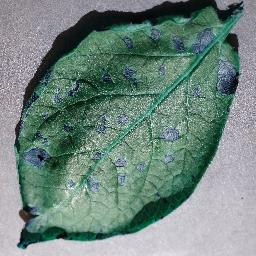

In [29]:
# Plotting image to compare

img = array_to_img(x_test[11])
img

In [30]:
# Finding max value from predition list and comaparing original value vs predicted

print("Originally : ", all_labels[np.argmax(y_test[11])])
print("Predicted : ", all_labels[np.argmax(y_pred[4])])
print(y_pred[2])

Originally :  Potato-Early_blight
Predicted :  Tomato-Bacterial_spot
[9.9999630e-01 3.7104473e-06 3.5317374e-18]


In [31]:
for i in range(50):
    print (all_labels[np.argmax(y_test[i])], " ", all_labels[np.argmax(y_pred [1])])

Potato-Early_blight   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Potato-Early_blight   Corn-Common_rust
Tomato-Bacterial_spot   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Potato-Early_blight   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Potato-Early_blight   Corn-Common_rust
Tomato-Bacterial_spot   Corn-Common_rust
Potato-Early_blight   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Potato-Early_blight   Corn-Common_rust
Potato-Early_blight   Corn-Common_rust
Potato-Early_blight   Corn-Common_rust
Potato-Early_blight   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Tomato-Bacterial_spot   Corn-Common_rust
Tomato-Bacterial_spot   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Potato-Early_blight   Corn-Common_rust
Potato-Early_blight   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Corn-Common_rust   Corn-Common_rust
Corn-Common